# Machine Learning Engineer Nanodegree
## Supervised Learning
## Capstone Project: Finding Relationships between Blood Glucose Level and Heart Rate.

The purpose of supervised learning is to learn based on the data that is given and confidently predict future results.  Using my Apple Watch and Dexcom Continuous Glucose Monitor (CGM), I am determined to find a relationship between my heart rate (HR) and my blood glucose (BG).  

**By finding a relationship, it provides another feature to help predict a users BG outside of the CGM. ** 

**You will first define the problem you want to solve and investigate potential solutions and performance metrics. **

## Introduction

## I. Definition
_(approx. 1-2 pages)_

### Project Overview
In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:
- _Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?_
- _Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?_

Diabetes is, unfortunately, on the rise in the world.  The number of cases of Type 1 Diabetes (T1D) and Type 2 Diabetes (T2D) has continually gone up since the we have begun to keep track (REF BOOK).  A diabetic is an individual that has lost some (T2D) or all (T1D) of their function islet cells in their pancreas that produce insulin and read BG levels in the blood stream.  Therefore, diabetics must monitor their BG by either drawing blood from their finger and placing that blood on a test strip for a machine to calculate the BG level.  The second way is to use a CGM.  This is a catheter device that is inserted under the skin in the interstitial fluid and can read a diabetics BG every 5 minutes and output it to a device or your phone.  The CGM is a magnificent device that helps diabetes see patterns and trends in their data.  With this data (both forms), a diabetic must determine if their BG is high or low and correct their BG by decreasing the BG with insulin or increasing the BG with carbs.  A lot of diabetics control their insulin intake with an insulin pump.  An insulin pump is catheter device that mechanical supplies insulin to the user through a set of pre-programmed and instant programming settings.  This device is used to simulate the insulin production of the body that diabetics cannot accomplish anymore.  As it can be seen from my description above, life as a diabetic can feel like an eternal game of seesaw.

I am a T1D and have been since 1988.  The medical field has done some amazing things to help me have a healthy life, but it is still extremely hard to maintain a healthy BG.  The American Diabetes Association (ADA) (REF) decided to put more funding into hard and software that could help diabetics like myself.  This project is called the Artificial Pancreas (AP) project.  The goal is find a close loop system that can measure the BG with a CGM and output the correct amount of insulin from an insulin pump.    This AP project is currently being worked on by some amazing groups (TypeZero, Medtronic, BigFoot Biomedical, Beta Biomedical).  These companies are writing algorithms to have the CGM and insulin pumps communicate so the BG can be regulated continuous throughout the day.  In a landmark move, Medtronic as produced the first ever FDA approved AP this year (DATE).

This work is amazing and very important to me.  However, as an engineer for over 10 years, I find comfort in redundancy.  Therefore, I am looking at my diabetic data in a completely different way to hopefully can use in the next generation of APs.

NEED MORE ABOUT MY PROCESS!

### Problem Statement
In this section, you will want to clearly define the problem that you are trying to solve, including the strategy (outline of tasks) you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:
- _Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?_
- _Have you thoroughly discussed how you will attempt to solve the problem?_
- _Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?_



## Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

## REGRESSION

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, 'passed', will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [16]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Read diabetes data
diabetes_data = pd.read_csv("DiabetesDataRPB.csv")
print "Diabetes data read successfully!"

Diabetes data read successfully!


## Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
+ The total number of data points or readings, n_readings.
    + This is readings from each device and manipulated into a cohesive time slot
+ The total number of features for each point in time, n_features.
+ The number of readings when BG is in range, n_normal.
+ The number of readings when BG is out of range (high or low), n_outOfRange.
+ The time in range, In_Range in percent (%).

In [17]:
# Calculate number of students
n_readings = len(diabetes_data["Basal Insulin"])

# Calculate number of features
n_features = len(diabetes_data.keys())

# Print the results
print "Total number of readings: {}".format(n_readings)
print "Number of features: {}".format(n_features)

Total number of readings: 576
Number of features: 4


In [18]:
feature_cols = list(diabetes_data.columns[:])
X_all = diabetes_data[feature_cols]
print "\nFeature values:"
print X_all.head()


Feature values:
   Bolus Taken  Basal Carbs (Liver)  Basal Insulin  Carbs Eaten
0          0.0             1.283155       3.849464          0.0
1          0.0             1.262734       3.788202          0.0
2          0.0             2.576919       3.730758          0.0
3          0.0             2.892478       3.677434          0.0
4          0.0             3.209471       3.628412          0.0


## Features:

The next function will add a few more features.

These are the constant features that have been loaded.  They will not change for this analysis.  In reality, `'Basal Carbs (liver)'` is very fluctuating and uncertain because the body will produce more carbs if, for example, the body works out.  However, for the data used in this analysis, I went to work and return home without changing my routine.  Therefore, the liver carbs should be pretty close to constant.

### Metrics
In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:
- _Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?_
- _Have you provided reasonable justification for the metrics chosen based on the problem and solution?_


## II. Analysis
_(approx. 2-4 pages)_


In [19]:
from basal import Basal 
from bolusTime import bolusTime
from carbCurve import Carbs
from carbCurveTime import CarbTIME

L = n_readings         # Length of Dataset
ISF = -37.7142857143   # Insulin Sensitivity Factor - How much one unit of insulin
                       # decreases BG (negative because it decreases BG)
C2R = 3.0              # How much 1 gram of Carbs raises BG level

# 1 - Bolus
basal, bolus = Basal(1,49) # creates curb for bolus ingestion
Bolus = bolusTime(bolus, 0, 1, L)

# 2 - CARBS
carb = Carbs(0.4, 0.0, L) # carb is calculated for an entire length of L
CarbsT = CarbTIME(carb, 3, 1)

#<---------- 
# Analysis: Part 3 - Calculate BG 
#<----------

CValue = 76.0  # Initialize a value for BG


def create_BG(CValue, diabetes_data, L, bolus, carb):
    # Create array for all the boluses that take place
    TB = [] # Total boluses combined from ingestion
    x = 0
    for x in range(L):
        TB.append(bolusTime(bolus, x, diabetes_data["Bolus Taken"][x], L))
        x += 1 
    TB = np.array(TB)
    TB = sum(TB)
    
    # Create array for all the Carbs that take place
    TC = []
    for x in range(L):
        TC.append((CarbTIME(carb, x, diabetes_data["Carbs Eaten"][x])))
        x += 1
    TC = np.array(TC)
    TC = sum(TC)
    
    # Create array for BG - Target!
    DFL = np.array(diabetes_data["Basal Carbs (Liver)"])
    DFB = np.array(diabetes_data["Basal Insulin"])
    DFB = DFB * -1       # Values decrease blood glucose
    DFL = DFL * C2R
    TC      = TC * C2R
    TB      = TB * ISF
    
    BG = [0.0]*L
    BG.insert(0,CValue)
    
    for x in range(1, L):
        BG[x] = BG[x-1] + DFL[x] + DFB[x] + TC[x] + TB[x]
        
    del BG[-1]
    
    return BG

#BG = create_BG(CValue, diabetes_data, L, bolus, carb)
#diabetes_data['BG'] = BG
#print BG

## Prepare Data
In this section, I will prepare the data for modeling, training, and testing.

## Identify feature and target columns

** *It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.* **

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [20]:
# Extract feature columns
feature_cols = list(diabetes_data.columns[:])

# Extract target column 'BG'
target_col = diabetes_data.columns[1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = diabetes_data[feature_cols]
y_all = diabetes_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['Bolus Taken', 'Basal Carbs (Liver)', 'Basal Insulin', 'Carbs Eaten']

Target column: Basal Carbs (Liver)

Feature values:
   Bolus Taken  Basal Carbs (Liver)  Basal Insulin  Carbs Eaten
0          0.0             1.283155       3.849464          0.0
1          0.0             1.262734       3.788202          0.0
2          0.0             2.576919       3.730758          0.0
3          0.0             2.892478       3.677434          0.0
4          0.0             3.209471       3.628412          0.0


## Implementation: Training and Testing Data Split

** So far, we have converted all categorical features into numeric values. ** For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
+ Randomly shuffle and split the data (X_all, y_all) into training and testing subsets.
    + Use 525 training points (roughly 75%) and 173 testing points.
    + Set a random_state for the function(s) you use, if provided.
    + Store the results in X_train, X_test, y_train, and y_test.

In [21]:
# Import any additional functionality you may need here
from sklearn import cross_validation

# Set the number of training points
num_train = int(n_readings*0.75)

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=num_test, random_state=1)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 432 samples.
Testing set has 144 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.

**The following supervised learning models are currently available in scikit-learn that you may choose from:**
+ Gaussian Naive Bayes (GaussianNB)
+ Decision Trees
+ Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
+ K-Nearest Neighbors (KNeighbors)
+ Stochastic Gradient Descent (SGDC)
+ Support Vector Machines (SVM)
+ Logistic Regression

## Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
+ Describe one real-world application in industry where the model can be applied. (You may need to do a small bit of research for this — give references!)
+ What are the strengths of the model; when does it perform well?
+ What are the weaknesses of the model; when does it perform poorly?
+ What makes this model a good candidate for the problem, given what you know about the data?

### These need to be answered as regression

# NEEDS WORK

1) K-Nearest Neighbors

2) Decision Tree Regression with AdaBoost

3) SVR


In [44]:
def train_regressor(regr, X_train, y_train):
    ''' Fits a regressor to the training data. '''
    
    # Start the clock, train the regressor, then stop the clock
    start = time()
    regr.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_BG(regr, X_all, y_all):
    ''' Makes predictions using a fit classifier based on R2 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = regr.predict(X_all)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return r2_score(y_all, y_pred), mean_absolute_error(y_all, y_pred), mean_squared_error(y_all, y_pred)

def train_predict(regr, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the regressor and the training set size
    print "Training a {} using a training set size of {}. . .".format(regr.__class__.__name__, len(X_train))
    
    # Train the regressor
    train_regressor(regr, X_train, y_train)
    
    r2s_train, mae_train, mse_train = predict_BG(regr, X_train, y_train)
    r2s_test, mae_test, mse_test = predict_BG(regr, X_test, y_test)
    
    # Print the results of prediction for both training and testing
    print "R2 score for training set: {:.4f}.".format(r2s_train)
    print "R2 score for test set: {:.4f}.".format(r2s_test)
    print "Mean Squared Error score for training set: {:.4f}.".format(mse_train)
    print "Mean Squared Error for test set: {:.4f}.".format(mse_test)
    print "Mean Absolute Error score for training set: {:.4f}.".format(mae_train)
    print "Mean Absolute Error for test set: {:.4f}.".format(mae_test)
    

## Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the train_predict function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:

+ Import the three supervised learning models you've discussed in the previous section.
+ Initialize the three models and store them in clf_A, clf_B, and clf_C.
    + Use a random_state for each model you use, if provided.
    + Note: Use the default settings for each model — you will tune one specific model in a later section.
+ Create the different training set sizes to be used to train each model.
    + Do not reshuffle and resplit the data! The new training points should be drawn from X_train and y_train.
+ Fit each model with each training set size and make predictions on the test set (9 in total).

**Note**: Three tables are provided after the following code cell which can be used to store your results.

In [45]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A - Decision Trees used
from sklearn import neighbors
# from sklearn import model_B
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# from skearln import model_C
from sklearn import svm

# TODO: Initialize the three models
clf_A = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
clf_B = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)
clf_C = svm.SVR(kernel='rbf', C=1e3, gamma=0.2)

# Set up the training set sizes
X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

X_train_400 = X_train[:400]
y_train_400 = y_train[:400]

# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for size in [200, 300, 400]:
    train_predict(clf_A, X_train[:size], y_train[:size], X_test, y_test)
    print "-------------------------------------------------------"

print "-------------------------------------------------------"
for size in [200, 300, 400]:
    train_predict(clf_B, X_train[:size], y_train[:size], X_test, y_test)
    print "-------------------------------------------------------"

print "-------------------------------------------------------"
for size in [200, 300, 400]:
    train_predict(clf_C, X_train[:size], y_train[:size], X_test, y_test)
    print "-------------------------------------------------------"

Training a KNeighborsRegressor using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0020 seconds.
Made predictions in 0.0010 seconds.
R2 score for training set: 1.0000.
R2 score for test set: 0.9817.
Mean Squared Error score for training set: 0.0000.
Mean Squared Error for test set: 0.0318.
Mean Absolute Error score for training set: 0.0000.
Mean Absolute Error for test set: 0.0765.
-------------------------------------------------------
Training a KNeighborsRegressor using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0030 seconds.
Made predictions in 0.0010 seconds.
R2 score for training set: 1.0000.
R2 score for test set: 0.9874.
Mean Squared Error score for training set: 0.0000.
Mean Squared Error for test set: 0.0220.
Mean Absolute Error score for training set: 0.0000.
Mean Absolute Error for test set: 0.0522.
-------------------------------------------------------
Training a KNeighborsRegressor using a

## Tabular Results

** Classifer 1 - KNeighborsRegressor**  

| Training Set Size | Training Time | Prediction Time (test) | R2 Score (train) | R2 Score (test) | Mean Squared Error Score (test) | Mean Absolute Error Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: | :-------------: |
| 300               |        0.0050           |        0.0020          |      1.0000      |    0.9817       |    0.0318       |    0.0765       |
| 400               |        0.0010           |        0.0020          |      1.0000      |    0.9874       |    0.0220       |    0.5200       |
| 500               |        0.0020           |        0.0020          |      1.0000      |    0.9914       |    0.0150       |    0.0500       |

** Classifer 2 - AdaBoostRegressor**  

| Training Set Size | Training Time | Prediction Time (test) | R2 Score (train) | R2 Score (test) | Mean Squared Error Score (test) | Mean Absolute Error Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: | :-------------: |
| 300               |        0.4780           |        0.0170          |      0.9997      |    0.9955       |    0.0078       |    0.0379       |
| 400               |        0.0880           |        0.0040          |      0.9994      |    0.9985       |    0.0027       |    0.4947       |
| 500               |        0.4480           |        0.0210          |      0.9997      |    0.9992       |    0.0015       |    0.4947       |
 
** Classifer 3 - SVR**  

| Training Set Size | Training Time | Prediction Time (test) | R2 Score (train) | R2 Score (test) | Mean Squared Error Score (test) | Mean Absolute Error Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: | :-------------: | :-------------: |
| 300               |        0.0020           |        0.0000          |      0.9978      |    0.9873       |    0.0222       |    0.0773       |
| 400               |        0.0020           |        0.0000          |      0.9986      |    0.9918       |    0.0142       |    0.0523       |
| 500               |        0.0020           |        0.0000          |      0.9986      |    0.9934       |    0.0115       |    0.0480       |
 


## Visualization of Data to Best Regressor:

Looking to see how the Regressor looks like when sitting on the data.

## Learning Curve

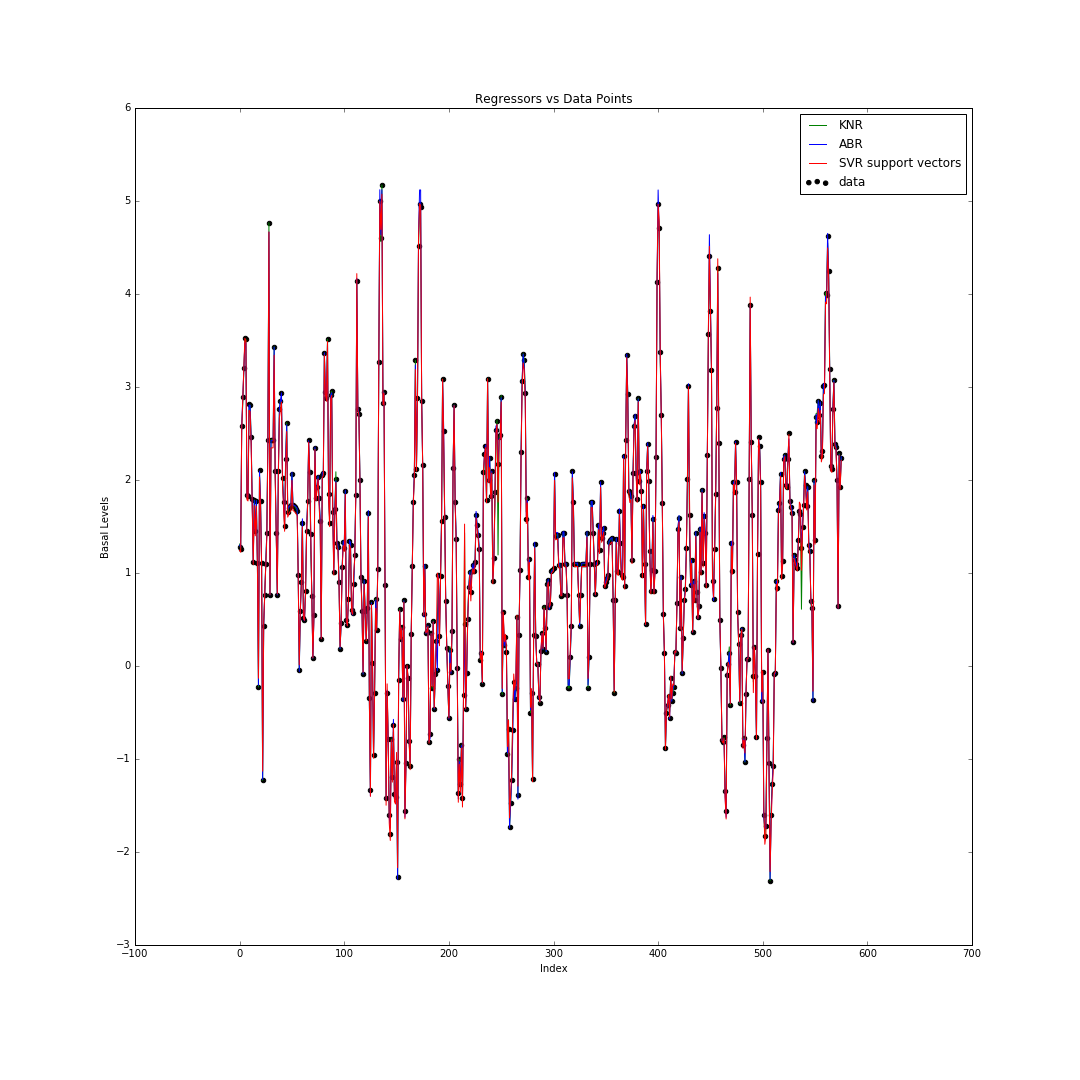

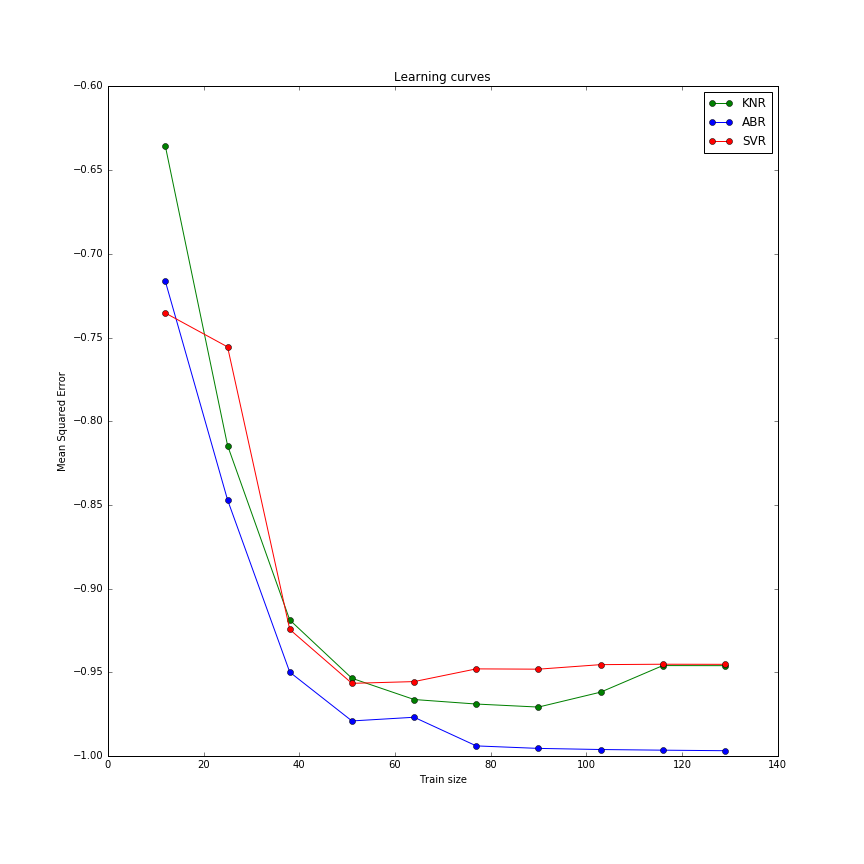

In [68]:
import sklearn.learning_curve as curves

y_pred1 = clf_A.predict(X_all)
y_pred2 = clf_B.predict(X_all)
y_pred3 = clf_C.predict(X_all)


# Visualize data and regression curves
plt.figure()
plt.figure(figsize=(15,15))
x_scat = range(n_readings)

plt.scatter(x_scat, diabetes_data["Basal Carbs (Liver)"], c='k', label='data', zorder=1)
plt.plot(x_scat, y_pred1, c='g', label='KNR', zorder=2)
plt.plot(x_scat, y_pred2, c='b', label='ABR', zorder=2)
plt.plot(x_scat, y_pred3, c='r', label='SVR support vectors',
            zorder=2)

plt.xlabel('Index')
plt.ylabel('Basal Levels')
plt.title('Regressors vs Data Points')
plt.legend()

# Visualize learning curves
plt.figure()
plt.figure(figsize=(12,12))

knr = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)
svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.2)


train_sizes, train_scores_knr, test_scores_knr = curves.learning_curve(knr, X_test, y_test, train_sizes=np.linspace(0.1, 1, 10),scoring = 'r2', cv=10)
train_sizes, train_scores_abr, test_scores_abr = curves.learning_curve(abr, X_test, y_test, train_sizes=np.linspace(0.1, 1, 10),scoring = 'r2', cv=10)
train_sizes, train_scores_svr, test_scores_svr = curves.learning_curve(svr, X_test, y_test, train_sizes=np.linspace(0.1, 1, 10),scoring = 'r2', cv=10)
  
plt.plot(train_sizes, -test_scores_knr.mean(1), 'o-', color="g",
         label="KNR")
plt.plot(train_sizes, -test_scores_abr.mean(1), 'o-', color="b",
         label="ABR")
plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()


# Choosing the Best Model
In this final section, you will choose from the three supervised learning models the best model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F1 score.

## Question 3 - Choosing the Best Model
Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

## Question 4 - Model in Layman's Terms
In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.

## Implementation: Model Tuning
Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

In [48]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV

# Create the parameters list you wish to tune
n_estimators_range = range(375,450,25) 
lr_range = [0.2, 0.5, 1.0, 1.5, 2.0]
loss_range =  ['linear', 'square', 'exponential']
param_grid = dict(n_estimators=n_estimators_range, learning_rate=lr_range, loss=loss_range)

# TODO: Initialize the classifier
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
r2_scorer = make_scorer(r2_score)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid=param_grid, scoring=r2_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

NameError: name 'predict_labels' is not defined

## Question 5 - Final Scores
What is the final model's F1 score for training and testing? How does that score compare to the untuned model?

Answer: Tuned model has a testing F1 score of 0.8591. This is about 1% pecentage point higher than the default SVM. It is also 4.75% pecentage points higher than the AdaBoost.

It is worth noting that I used the StratifiedShuffleSplit cross-validation generator. This was done because we are dealing with an unbalanced dataset. Our target row has 67% of students passing and 33% failing. Therefore the StratisfiedShuffleSplit was used because it creates splits by preserving the same percentage for each target class as in the complete set. - See ref: http://scikit-learn.org/stable/modules/cross_validation.html